In [2]:
#Import the Libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

In [8]:
#Importing of the dataset 
users=pd.read_csv("Users.csv")
users

,User-ID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN
...,...,...,...
278853,278854,"portland, oregon, usa",NaN
278854,278855,"tacoma, washington, united kingdom",50.0
278855,278856,"brampton, ontario, canada",NaN
278856,278857,"knoxville, tennessee, usa",NaN


# **CHECKING FOR MISSING VALUES WITH VISUALISATION**

In [9]:
users.describe()

,User-ID,Age
count,278858.00000,168096.000000
mean,139429.50000,34.751434
std,80499.51502,14.428097
min,1.00000,0.000000
25%,69715.25000,24.000000
50%,139429.50000,32.000000
75%,209143.75000,44.000000
max,278858.00000,244.000000


In [3]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 278858 entries, 0 to 278857
Data columns (total 3 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   User-ID   278858 non-null  int64  
 1   Location  278858 non-null  object 
 2   Age       168096 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 6.4+ MB


In [10]:
#checking for Null values 
users.isnull().sum()

User-ID          0
Location         0
Age         110762
dtype: int64

In [11]:
#Hence it is clear from above that there is presence of Null values in 'Age' column

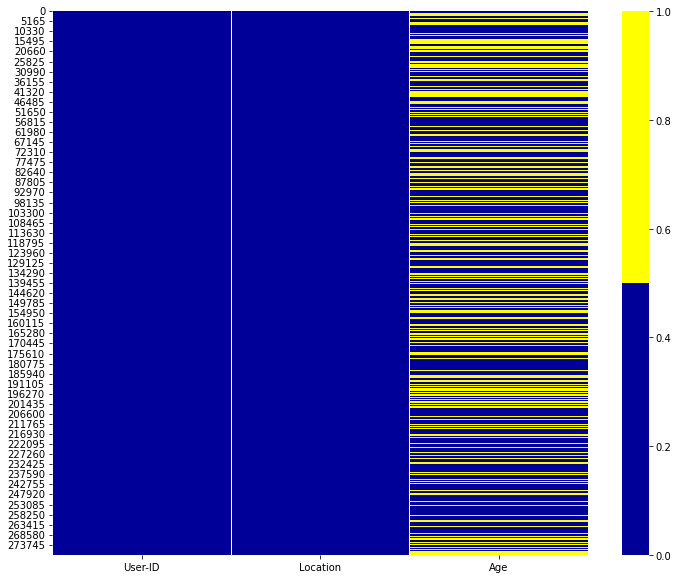

In [12]:
#Plotting of Null values 
fig=plt.figure(figsize=(12,10))
cols=users.columns
colours = ['#000099','#ffff00'] #specify the colours Yellow = missing value , Blue = not missing
sns.heatmap(users[cols].isnull(),
            cmap=sns.color_palette(colours))                            

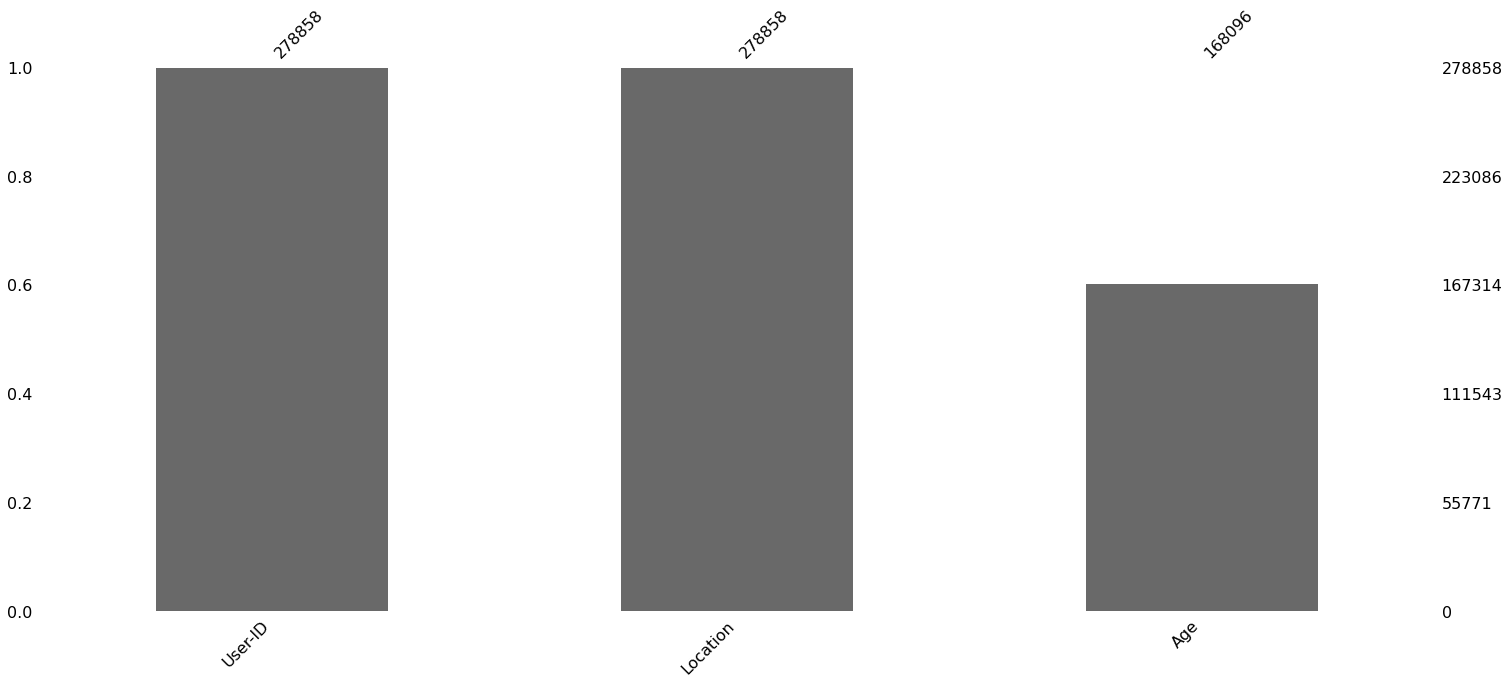

In [13]:
#Plotting bar plot for missing values 
import missingno as msno
fig=plt.figure(figsize=(4,6))
msno.bar(users)

In [14]:
#Hence from above two plots we can clearly see missing values in 'Age" column around 40 %

# **OUTLIER DETECTION**

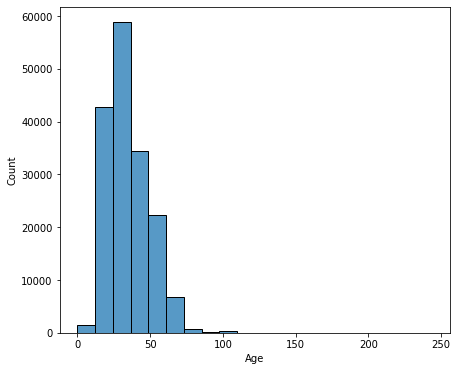

In [17]:
#Histogram of Age 
fig=plt.figure(figsize=(7,6))
sns.histplot(users['Age'],bins=20)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


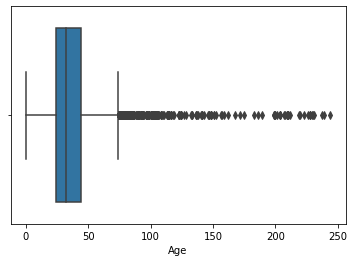

In [18]:
sns.boxplot(users['Age'])

In [19]:
data=users.copy()

In [20]:
#Boxplot
def plot_box(df,ft):
  df.boxplot(column=[ft])
  plt.grid(False)
  plt.show()

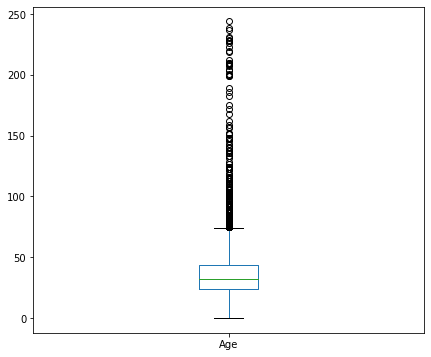

In [21]:
fig=plt.figure(figsize=(7,6))
plot_box(data,"Age")

In [22]:
#Define a Function outliers in which we will store outliers
def outliers(df,ft):
  Q1= df[ft].quantile(0.25)
  Q3= df[ft].quantile(0.75)
  IQR = Q3-Q1

  lower_bound=Q1-1.5*IQR
  upper_bound=Q3+1.5*IQR

  ls=df.index [ (df[ft]<lower_bound)| (df[ft]>upper_bound) ]

  return ls

In [23]:
#create an empty list to store output indices from multiple rows
index_list = []
for feature in ['Age']:
  index_list.extend(outliers(data,feature))

In [24]:
index_list

[220,
 689,
 957,
 1147,
 1288,
 1322,
 1485,
 1578,
 2250,
 2655,
 3084,
 3210,
 3436,
 3635,
 3688,
 4090,
 4254,
 4346,
 4677,
 4782,
 5158,
 5796,
 6523,
 6711,
 6872,
 7820,
 7920,
 8067,
 8329,
 8457,
 8654,
 8664,
 8781,
 8929,
 11054,
 11086,
 11325,
 11389,
 11584,
 12227,
 12691,
 13074,
 13080,
 13272,
 13518,
 13759,
 13800,
 14202,
 16034,
 16346,
 16456,
 16489,
 16795,
 17040,
 17095,
 17111,
 17375,
 17735,
 17771,
 17883,
 17902,
 18569,
 18572,
 18734,
 19262,
 20201,
 20229,
 20687,
 20838,
 20856,
 20932,
 22004,
 22062,
 22118,
 22618,
 22987,
 23457,
 23568,
 23668,
 23741,
 23866,
 23895,
 23897,
 23947,
 24034,
 24194,
 24410,
 24434,
 24477,
 24859,
 25030,
 25077,
 25100,
 25124,
 25445,
 25472,
 25551,
 25592,
 25742,
 25842,
 26051,
 26082,
 26509,
 26794,
 27096,
 27344,
 27544,
 27637,
 27717,
 28090,
 28372,
 28377,
 28543,
 28645,
 28798,
 28966,
 29107,
 29483,
 29775,
 29861,
 30504,
 30589,
 30649,
 30813,
 30939,
 31342,
 31602,
 32165,
 32641,
 3265

In [25]:
#define a function remove which will provide data without outliers
def remove (df,ls):
  ls= sorted(set(ls))
  df=df.drop(ls)
  return df

In [26]:
data_cleaned=remove(data,index_list)
data_cleaned.shape

(277774, 3)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


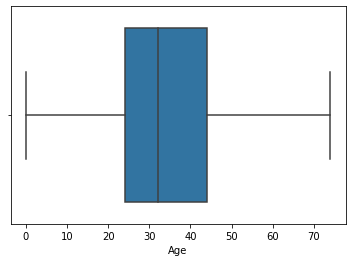

In [27]:
sns.boxplot(data_cleaned['Age'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'After Outlier data processing')

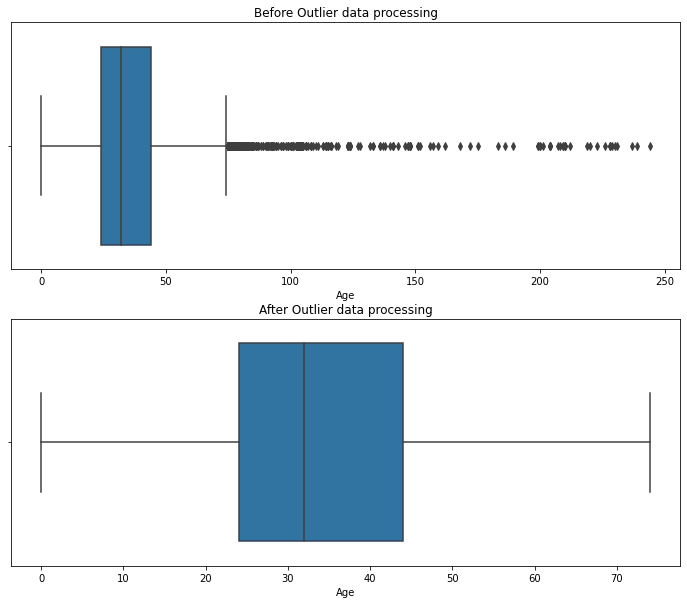

In [28]:
#Before and After outlier removal
fig, ax = plt.subplots(2,figsize=(12,10))
sns.boxplot(users['Age'],ax=ax[0])
ax[0].set_title("Before Outlier data processing")
sns.boxplot(data_cleaned['Age'],ax=ax[1])
ax[1].set_title("After Outlier data processing")

Text(0.5, 1.0, 'After Outlier data processing')

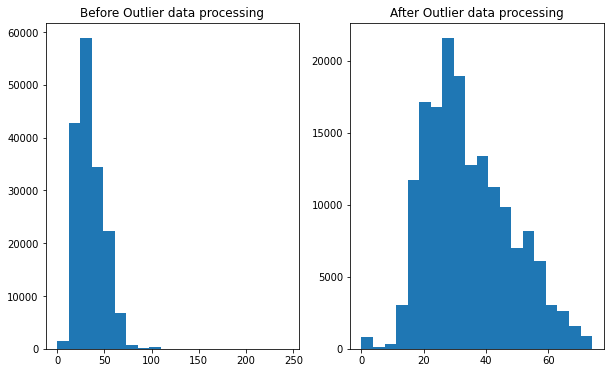

In [31]:
fig, ax = plt.subplots(1,2,figsize=(10,6)) 
ax[0].hist(users["Age"],bins=20) 
ax[0].set_title("Before Outlier data processing")

ax[1].hist(data_cleaned["Age"],bins=20)   
ax[1].set_title("After Outlier data processing")

In [32]:
#calculate mean for cleaned data set to impute values 
data_cleaned["Age"].describe()

count    167012.000000
mean         34.373590
std          13.517693
min           0.000000
25%          24.000000
50%          32.000000
75%          44.000000
max          74.000000
Name: Age, dtype: float64

In [33]:
#We will impute mean rounded off to 34 in our original dataset 
users['Age'].fillna(34,inplace=True)

In [34]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 278858 entries, 0 to 278857
Data columns (total 3 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   User-ID   278858 non-null  int64  
 1   Location  278858 non-null  object 
 2   Age       278858 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 6.4+ MB


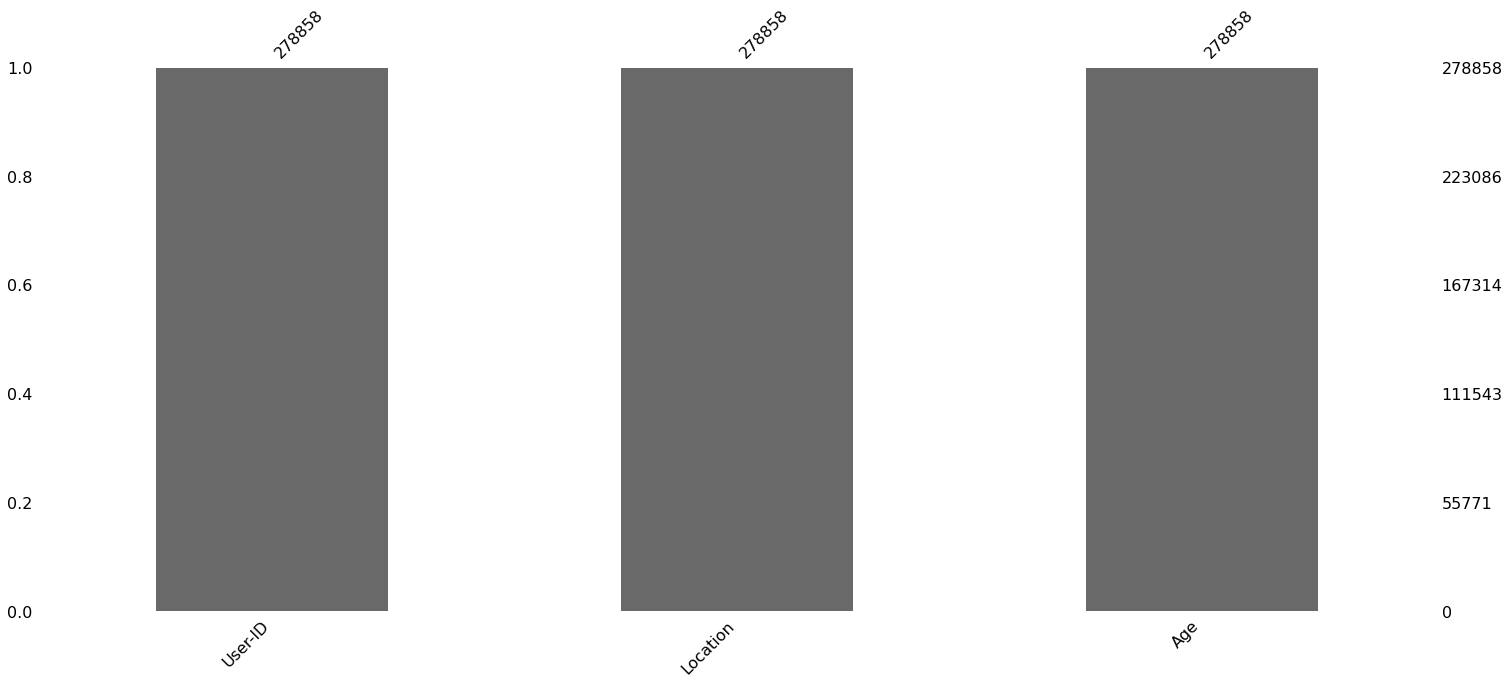

In [35]:
#Visualisation of cleaned Data
fig=plt.figure(figsize=(4,6))
msno.bar(users)

In [36]:
#Display of Age > 100 i.e outliers 
users[users.Age > 100]

,User-ID,Location,Age
1288,1289,"san jose, california, usa",103.0
1322,1323,"milano, lombardia, italy",104.0
1578,1579,"akure, ondo/nigeria, nigeria",231.0
3084,3085,"zürich, switzerland, switzerland",104.0
3210,3211,"le mesnil saint denis, yvelines, france",119.0
...,...,...,...
276047,276048,"wien, wien, austria",127.0
276352,276353,"hillsdale, new york, usa",104.0
277107,277108,"quinto, ticino, switzerland",104.0
277503,277504,"san diego, california, usa",103.0


In [37]:
#Display of Age < 15 i.e outliers in original dataset
users[users.Age < 15]

,User-ID,Location,Age
10,11,"melbourne, victoria, australia",14.0
18,19,"weston, ,",14.0
40,41,"santee, california, usa",14.0
119,120,"villeneuve d`ascq, nord, france",13.0
219,220,"bogota, bogota, colombia",0.0
...,...,...,...
278574,278575,"burnaby, british columbia, canada",14.0
278582,278583,"steele, missouri, usa",13.0
278668,278669,"spring hill, fl, hernando",13.0
278751,278752,"london, nova scotia, canada",9.0


In [38]:
#Replacing Age>100 with 100
users["Age"] = np.where(users["Age"] >100, 100,users['Age'])
users[users.Age > 100]

,User-ID,Location,Age


In [39]:
users.loc[1288]

User-ID                          1289
Location    san jose, california, usa
Age                             100.0
Name: 1288, dtype: object

In [40]:
#Replacing Age<15 with 15
users["Age"] = np.where(users["Age"] <15, 15,users['Age'])
users[users.Age < 15]

,User-ID,Location,Age


In [41]:
users.loc[119]

User-ID                                 120
Location    villeneuve d`ascq, nord, france
Age                                    15.0
Name: 119, dtype: object

In [66]:
books=pd.read_csv("Books.csv")
books

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (3) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/0195153448.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/0195153448.01.LZZZZZZZ.jpg
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/0002005018.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/0002005018.01.LZZZZZZZ.jpg
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/0060973129.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/0060973129.01.LZZZZZZZ.jpg
3,0374157065,Flu: The Story of the Great Influenza Pandemic of 1918 and the Search for the Virus That Caused It,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/0374157065.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/0374157065.01.LZZZZZZZ.jpg
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/0393045218.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/0393045218.01.LZZZZZZZ.jpg
...,...,...,...,...,...,...,...,...
271355,0440400988,There's a Bat in Bunk Five,Paula Danziger,1988,Random House Childrens Pub (Mm),http://images.amazon.com/images/P/0440400988.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/0440400988.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/0440400988.01.LZZZZZZZ.jpg
271356,0525447644,From One to One Hundred,Teri Sloat,1991,Dutton Books,http://images.amazon.com/images/P/0525447644.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/0525447644.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/0525447644.01.LZZZZZZZ.jpg
271357,006008667X,Lily Dale : The True Story of the Town that Talks to the Dead,Christine Wicker,2004,HarperSanFrancisco,http://images.amazon.com/images/P/006008667X.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/006008667X.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/006008667X.01.LZZZZZZZ.jpg
271358,0192126040,Republic (World's Classics),Plato,1996,Oxford University Press,http://images.amazon.com/images/P/0192126040.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/0192126040.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/0192126040.01.LZZZZZZZ.jpg


In [67]:
#Checking info about data
books.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271360 entries, 0 to 271359
Data columns (total 8 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   ISBN                 271360 non-null  object
 1   Book-Title           271360 non-null  object
 2   Book-Author          271359 non-null  object
 3   Year-Of-Publication  271360 non-null  object
 4   Publisher            271358 non-null  object
 5   Image-URL-S          271360 non-null  object
 6   Image-URL-M          271360 non-null  object
 7   Image-URL-L          271357 non-null  object
dtypes: object(8)
memory usage: 16.6+ MB


In [68]:
#Checking for Null values 
books.isnull().sum()

ISBN                   0
Book-Title             0
Book-Author            1
Year-Of-Publication    0
Publisher              2
Image-URL-S            0
Image-URL-M            0
Image-URL-L            3
dtype: int64

In [69]:
#Dropping all image columns as we plan to not use it further for our model
book=books.drop(['Image-URL-S', 'Image-URL-M','Image-URL-L'], axis=1)
book.head(3)

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial


In [70]:
#hence from above there is very less null values present which are acceptable
#Checking value counts of years >2021
book["Year-Of-Publication"].value_counts()

2002    13903
2001    13715
1999    13414
2000    13373
1998    12116
        ...  
1924    1    
2012    1    
1927    1    
1931    1    
2037    1    
Name: Year-Of-Publication, Length: 202, dtype: int64

In [71]:
book['Year-Of-Publication'].unique()

array([2002, 2001, 1991, 1999, 2000, 1993, 1996, 1988, 2004, 1998, 1994,
       2003, 1997, 1983, 1979, 1995, 1982, 1985, 1992, 1986, 1978, 1980,
       1952, 1987, 1990, 1981, 1989, 1984, 0, 1968, 1961, 1958, 1974,
       1976, 1971, 1977, 1975, 1965, 1941, 1970, 1962, 1973, 1972, 1960,
       1966, 1920, 1956, 1959, 1953, 1951, 1942, 1963, 1964, 1969, 1954,
       1950, 1967, 2005, 1957, 1940, 1937, 1955, 1946, 1936, 1930, 2011,
       1925, 1948, 1943, 1947, 1945, 1923, 2020, 1939, 1926, 1938, 2030,
       1911, 1904, 1949, 1932, 1928, 1929, 1927, 1931, 1914, 2050, 1934,
       1910, 1933, 1902, 1924, 1921, 1900, 2038, 2026, 1944, 1917, 1901,
       2010, 1908, 1906, 1935, 1806, 2021, '2000', '1995', '1999', '2004',
       '2003', '1990', '1994', '1986', '1989', '2002', '1981', '1993',
       '1983', '1982', '1976', '1991', '1977', '1998', '1992', '1996',
       '0', '1997', '2001', '1974', '1968', '1987', '1984', '1988',
       '1963', '1956', '1970', '1985', '1978', '1973', '1980'

In [72]:
pd.set_option('display.max_colwidth', -1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  """Entry point for launching an IPython kernel.


In [73]:
book.loc[books['Year-Of-Publication'] =='DK Publishing Inc']

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher
209538,078946697X,"DK Readers: Creating the X-Men, How It All Began (Level 4: Proficient Readers)\"";Michael Teitelbaum""",2000,DK Publishing Inc,http://images.amazon.com/images/P/078946697X.01.THUMBZZZ.jpg
221678,0789466953,"DK Readers: Creating the X-Men, How Comic Books Come to Life (Level 4: Proficient Readers)\"";James Buckley""",2000,DK Publishing Inc,http://images.amazon.com/images/P/0789466953.01.THUMBZZZ.jpg


In [74]:
#In above two records almost all columns are mismatched 
#Hence correcting the values 
book.at[209538,'Year-Of-Publication']='2000'
book.at[209538,'Book-Author']='Michael Teitelbaum'
book.at[209538,'Publisher']='DK Publishing Inc'

In [75]:
book.loc[[209538]]

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher
209538,078946697X,"DK Readers: Creating the X-Men, How It All Began (Level 4: Proficient Readers)\"";Michael Teitelbaum""",Michael Teitelbaum,2000,DK Publishing Inc


In [76]:
book.at[221678,'Year-Of-Publication']='2000'
book.at[221678,'Book-Author']='James Buckley'
book.at[221678,'Publisher']='DK Publishing Inc'

In [77]:
book.loc[[221678]]

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher
221678,0789466953,"DK Readers: Creating the X-Men, How Comic Books Come to Life (Level 4: Proficient Readers)\"";James Buckley""",James Buckley,2000,DK Publishing Inc


In [78]:
#exploring Another wrong year gallimard 
book.loc[books['Year-Of-Publication'] =='Gallimard']

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher
220731,2070426769,"Peuple du ciel, suivi de 'Les Bergers\"";Jean-Marie Gustave Le ClÃ?Â©zio""",2003,Gallimard,http://images.amazon.com/images/P/2070426769.01.THUMBZZZ.jpg


In [79]:
#Correcting 
book.at[220731,'Year-Of-Publication']='2003'
book.at[220731,'Book-Author']='Jean-Marie Gustave Le ClÃƒ?Ã‚Â©zio"'
book.at[220731,'Publisher']='Gallimard'
book.at[220731,'Book-Title']='Peuple du ciel, suivi de Les Bergers'

In [80]:
book.loc[[220731]]

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher
220731,2070426769,"Peuple du ciel, suivi de Les Bergers","Jean-Marie Gustave Le ClÃƒ?Ã‚Â©zio""",2003,Gallimard


In [81]:
book.loc[books['Year-Of-Publication'] =='2037']

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher
255409,068471809X,To Have and Have Not,Ernest Hemingway,2037,Simon &amp; Schuster


In [82]:
## Converting year of publication in Numbers
book['Year-Of-Publication'] = book['Year-Of-Publication'].astype(int)

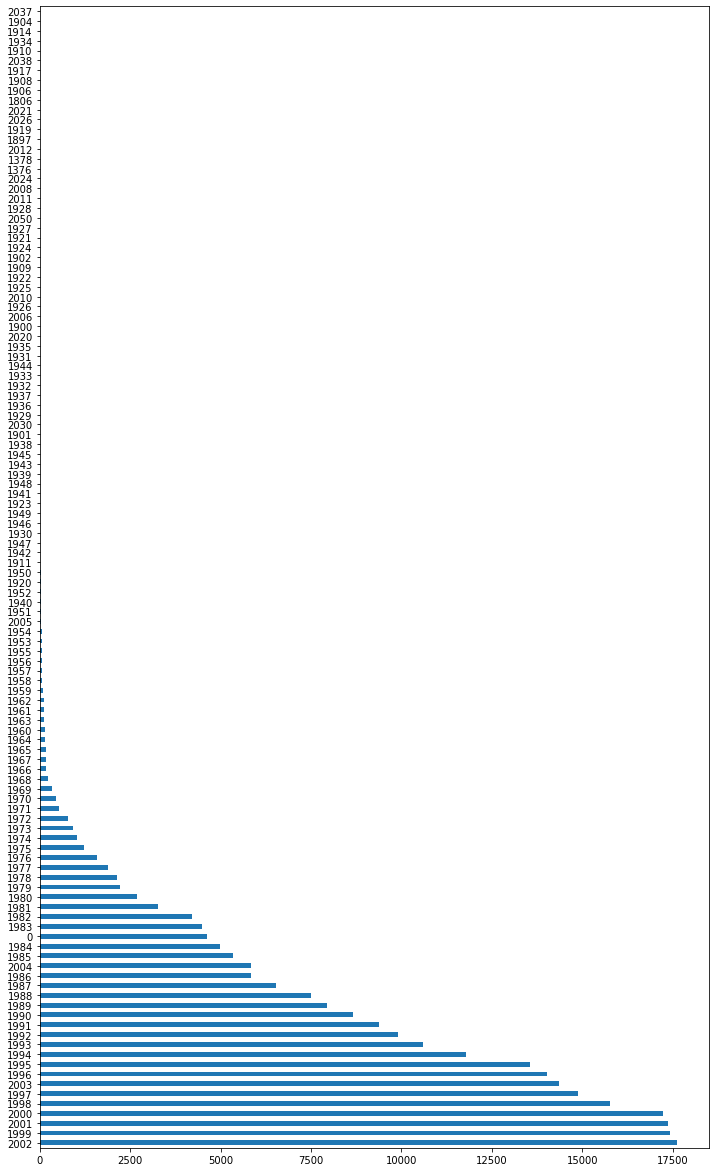

In [83]:
#plotting value counts of year of publication
fig=plt.figure(figsize=(12,21))
book["Year-Of-Publication"].value_counts().plot(kind='barh')

In [84]:
#Hence max data year with counts is 2002 
#Also 2037 year is also present so we will replace all >2022 with 2021
#And with 0 as 2002
book["Year-Of-Publication"] = np.where(book["Year-Of-Publication"] >2022,2021,book['Year-Of-Publication'])
book["Year-Of-Publication"] = np.where(book["Year-Of-Publication"] ==0,2002,book['Year-Of-Publication'])

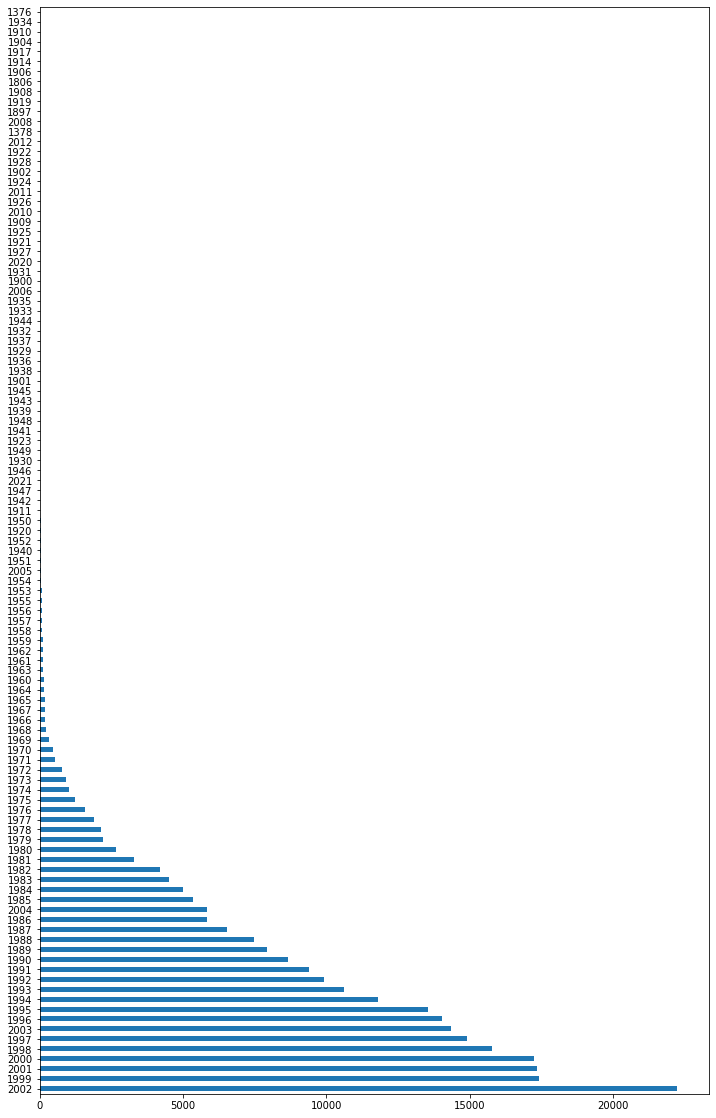

In [85]:
fig=plt.figure(figsize=(12,20))
book["Year-Of-Publication"].value_counts().plot(kind='barh')

In [86]:
#Importing ratings dataset
rating=pd.read_csv("Ratings.csv")
rating

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6
...,...,...,...
1149775,276704,1563526298,9
1149776,276706,0679447156,0
1149777,276709,0515107662,10
1149778,276721,0590442449,10


In [87]:
#Checking the Dataset values 
rating.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1149780 entries, 0 to 1149779
Data columns (total 3 columns):
 #   Column       Non-Null Count    Dtype 
---  ------       --------------    ----- 
 0   User-ID      1149780 non-null  int64 
 1   ISBN         1149780 non-null  object
 2   Book-Rating  1149780 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 26.3+ MB


In [88]:
#Checking for Null values 
rating.isnull().sum()

User-ID        0
ISBN           0
Book-Rating    0
dtype: int64

In [89]:
#Checking Book Ratings Value counts 
rating['Book-Rating'].value_counts()

0     716109
8     103736
10    78610 
7     76457 
9     67541 
5     50974 
6     36924 
4     8904  
3     5996  
2     2759  
1     1770  
Name: Book-Rating, dtype: int64

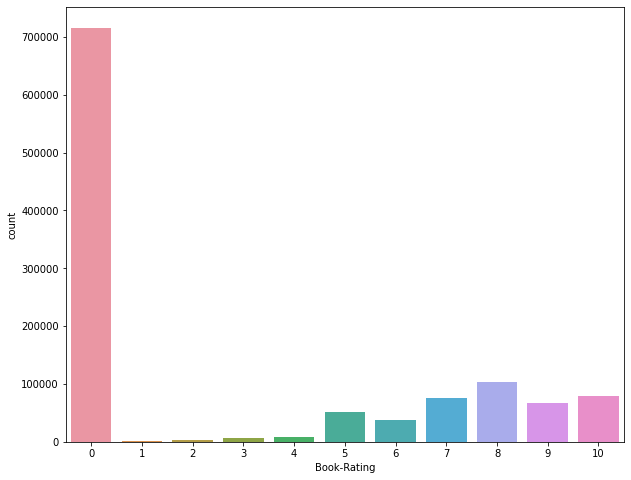

In [90]:
#Plotting Book ratings value counts for getting more idea about data
plt.figure(figsize=(10,8))
sns.countplot(x="Book-Rating", data=rating)

In [91]:
#So we found out from above that '0' ratings have more data records compartively
#As there is no need for data cleaning in ratings dataset 
#Hence merging books and ratings dataset 
data1=pd.merge(rating,book,on=['ISBN'],how='inner')

In [92]:
data1

,User-ID,ISBN,Book-Rating,Book-Title,Book-Author,Year-Of-Publication,Publisher
0,276725,034545104X,0,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books
1,2313,034545104X,5,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books
2,6543,034545104X,0,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books
3,8680,034545104X,5,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books
4,10314,034545104X,9,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books
...,...,...,...,...,...,...,...
1031131,276688,0517145553,0,Mostly Harmless,Douglas Adams,1995,Random House Value Pub
1031132,276688,1575660792,7,Gray Matter,Shirley Kennett,1996,Kensington Publishing Corporation
1031133,276690,0590907301,0,Triplet Trouble and the Class Trip (Triplet Trouble),Debbie Dadey,1997,Apple
1031134,276704,0679752714,0,A Desert of Pure Feeling (Vintage Contemporaries),Judith Freeman,1997,Vintage Books USA


In [93]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1031136 entries, 0 to 1031135
Data columns (total 7 columns):
 #   Column               Non-Null Count    Dtype 
---  ------               --------------    ----- 
 0   User-ID              1031136 non-null  int64 
 1   ISBN                 1031136 non-null  object
 2   Book-Rating          1031136 non-null  int64 
 3   Book-Title           1031136 non-null  object
 4   Book-Author          1031135 non-null  object
 5   Year-Of-Publication  1031136 non-null  int64 
 6   Publisher            1031134 non-null  object
dtypes: int64(3), object(4)
memory usage: 62.9+ MB
